# Accident on Expressway

Assignment 1 - accident on expressway (Business Intelligence)

รายชื่อผู้จัดทำ              

- นางสาวกรกนก กลิ่นสุมาลี 6341005826
- นายนพกฤษฏิ์ ภูริสุริยโรจน์ 6341109426


-------------
## ความสำคัญของข้อมูล
ที่มา - ประเทศไทยเป็นประเทศหนึ่งที่มีการเกิดอุบัติเหตุเกิดขึ้นมากมายการเดินทางบนทางด่วนนั้น เป็นพื้นที่ที่ทุกคนอาจเรียกได้ว่าปลอดภัยที่สุด

เนื่องจาก
- รถยนต์ใช้ได้เท่านั้น
- ไม่มีผู้คนสัญจรไปมา
- ไม่มีสิ่งกีดขวาง
- ไม่มีโค้กหักศอก
- ไม่มีมุมอับสายตา

แต่ทว่าบนทางด่วนที่ปลอดภัยต่อการขับรถนั้น ยังคงเกิดอุบัติเหตุขึ้นมากมาย โดยเนื้อหาในรายงานเล่มนี้จะเป็นการหาที่มาของปัญหา และสำรวจข้อมูล


------------
## ที่มา
* องค์กร : การทางพิเศษแห่งประเทศไทย
* ที่มา : https://data.go.th/dataset/vachara


------------
## import libary

In [27]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import ipywidgets as widgets
from ipywidgets import interact

plt.rcParams['font.family'] = 'Tahoma'


In [28]:
# Version
print(f'python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'ipywidgets version: {widgets.__version__}')

python version: 3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.2
seaborn version: 0.12.2
ipywidgets version: 8.0.4


In [29]:
# Read Data from Github

df1 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2561.csv')
df2 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2562.csv')
df3 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2563.csv')
df4 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2564.csv')
df5 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2565.csv')


In [30]:
# Sampling the Data from Dataframe

df4.sample(5)


,accident_date,accident_time,step,ad_state,acman_rec,acfem_rec,deadman_rec,deadfem_rec,cause_type
719,2020-10-10 01:17:17,01:17:17,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
502,2021-01-16 20:42:42,20:42:42,บูรพาวิถี,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
288,2021-04-29 16:05:05,16:05:05,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
71,2021-09-05 13:20:20,13:20:20,บูรพาวิถี,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
417,2021-03-04 13:12:12,13:12:12,บางพลี-สุขสวัสดิ์,ปกติ,0,0,0,0,นับเงินทอนค่าผ่านทาง


---
## Clean data
- เปลี่ยนชื่อ column ให้ถูกต้อง จัดข้อมูลในแต่ละ column ให้เป็นไปในรูปแบบเดียวกัน / มีประเภทของข้อมูลที่เหมือนกัน
- รวม dataframe ในแต่ละปีให้เป็น dataframe เดียวกัน
- รวมกลุ่มข้อมูลจัดให้อยู่ในรูปแบบของ dictionary 
- จัดการข้อมูลใน column สาเหตุของการเกิดอุบัติเหตุ


In [31]:
# Present All Column Header in Each DataFrame

df_lists = [df1,df2,df3,df4,df5]
for i,dataframe in enumerate(df_lists):
    print(f'{i+2561} - {dataframe.columns.to_list()}')
    

2561 - ['accident_date', 'accident_time', 'expw_step', 'weather_state', 'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause']
2562 - ['accident_date', 'accident_time', 'expw_step', 'weather_state', 'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause']
2563 - ['accident_date', 'accident_time', 'expw_step', 'weather_state', 'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause']
2564 - ['accident_date', 'accident_time', 'step', 'ad_state', 'acman_rec', 'acfem_rec', 'deadman_rec', 'deadfem_rec', 'cause_type']
2565 - ['accident_date', 'accident_time', 'expw_step', 'weather_state', 'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause']


In [32]:
# Set Correct Column Name
correct_column = ['accident_date', 'accident_time', 'express_way', 'weather_status','injury_male', 'injury_female', 'dead_male', 'dead_female', 'cause']

# Change All Column Name 
dataframe_list = [df1, df2, df3, df4, df5]
for dataframe in dataframe_list:
    dataframe.columns = correct_column


In [33]:
# Remove Time from Accident_date Column
df4['accident_date'] = df4['accident_date'].str[:10]


In [34]:
# Combining All Files & Reset Index
df = pd.concat([df1, df2, df3, df4, df5])
df.reset_index(drop=True, inplace=True)
df


,accident_date,accident_time,express_way,weather_status,injury_male,injury_female,dead_male,dead_female,cause
0,2018-03-20,18:07:07,ศรีรัช,ปกติ,0,0,0,0,เบรคกระทันหัน
1,2018-08-07,23:12:12,ศรีรัช,ปกติ,0,0,0,0,เข้าผิดช่องทาง
2,2018-05-30,08:34:34,ศรีรัช,ปกติ,0,0,0,0,ก้มเก็บเงิน
3,2017-11-22,16:51:51,ศรีรัช,ปกติ,0,0,0,0,ขับชิดขอบทางมาก
4,2018-06-27,08:12:12,ศรีรัช,ปกติ,0,0,0,0,ถอยเบียดแท่นปูน
...,...,...,...,...,...,...,...,...,...
4369,2021-10-04,16:19:19,บูรพาวิถี,ปกติ,2,0,0,0,ยางแตก
4370,2021-10-03,10:43:43,บางพลี-สุขสวัสดิ์,ปกติ,1,0,0,0,ไม่ชะลอความเร็ว
4371,2021-10-03,21:56:56,ศรีรัช-วงแหวนรอบนอก,ฝนตก,0,0,0,0,ขับรถเร็วเกินไป
4372,2021-10-01,11:25:25,ศรีรัช,ปกติ,0,0,0,0,เบรคขัดข้อง


In [35]:
# Combine Column Date and Time to Column Timestamp

df['accident_date'] = pd.to_datetime(df['accident_date'].astype(str) + ' ' + df['accident_time'].astype(str))

del df['accident_time']

df.rename(columns={'accident_date': 'accident_timestamp'}, inplace=True)

df.sample(5)


,accident_timestamp,express_way,weather_status,injury_male,injury_female,dead_male,dead_female,cause
2158,2020-02-18 08:23:23,ฉลองรัช,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
691,2018-07-07 04:28:28,ศรีรัช,ปกติ,0,0,0,0,สาเหตุจากสภาพรถ/ถนน
3307,2020-12-17 11:50:50,ศรีรัช,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
2795,2021-09-18 11:34:34,ฉลองรัช,ปกติ,1,0,0,0,สภาพแวดล้อม
4043,2022-02-23 09:00:00,บางพลี-สุขสวัสดิ์,ปกติ,0,0,0,0,ขับรถเร็วเกินไป


In [36]:
# Check the information of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4374 entries, 0 to 4373
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   accident_timestamp  4374 non-null   datetime64[ns]
 1   express_way         4374 non-null   object        
 2   weather_status      4374 non-null   object        
 3   injury_male         4374 non-null   int64         
 4   injury_female       4374 non-null   int64         
 5   dead_male           4374 non-null   int64         
 6   dead_female         4374 non-null   int64         
 7   cause               4374 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 273.5+ KB


In [37]:
# See the possible value of cause
print(f"Number of possible value : {len(df['cause'].unique())} ")
df['cause'].unique()


Number of possible value : 277 


array(['เบรคกระทันหัน', 'เข้าผิดช่องทาง', 'ก้มเก็บเงิน',
       'ขับชิดขอบทางมาก', 'ถอยเบียดแท่นปูน', 'ขับชิดมากเกินไป',
       'เบรคกระทันหหัน', 'ขับถอยหลัง', 'ไม่ทันสังเกตุ', 'ก้มหยิบของ',
       'ถอยหลังเข้าตู้ผิด', 'ขับชิดขวามากเกินไป', 'หยิบของในรถ',
       'ผู้ขับขี่ก้มหยิบของ', 'ขับรถช้าลง', 'เชี่ยวชน',
       'บรรทุกหนักเกินไป', 'รอตรวจสอบ', 'ความร้อนขึ้นแล้วฟืนขับต่อ',
       'จอดเลนฉุกเฉิน', 'เสียหลักพลิกคว่ำ', 'กระบะจอดช่วงทางโค้ง',
       'ขับขี่ย้อนศร', 'กระระยะผิดก่อนเจ้าตู้2',
       'ก้มเก็บสิ่งของในห้องโดยสาร', '.', 'ชนท้าย', 'ยางแตก',
       'รอการตรวจสอบ', 'มึนเมา', 'ไม่ทราบสาเหตุ', 'ผู้ขับขี่หมดสติ',
       'รถมีขนาดใหญ่เกินไป', 'เบรคไม่ทัน', 'วิ่งช่องฉุกเฉิน',
       'กระบะจอดตรวจสอบสิ่งของ', 'ไฟฟ้าลัดวงจร', 'เพลิงไหม้',
       'เบรคกะทันหัน', 'เสียหลัก', 'ขับรถประมาท', 'บรรทุกยื่นล้ำ',
       'ขับรถโดยประมาท', 'ล้อหลุดไปชนรถคู่กรณี',
       'ขับรถเร็วในช่องทางฉุกเฉิน', 'เฉียวชนแล้วหลบหนี', 'เบรกติดล้อ',
       'ประมาท ขับรถเร็ว', 'ไม่มีอีซี่พาส', 'กำลังจะไปช่วย ว.

In [38]:
# Clean space between character
df['cause'] = df['cause'].str.strip()

In [39]:
# Create dictionary to group the data

cause_cleaned = {'ขับรถเร็วเกินกำหนด':['เร็ว'],
'ใช้โทรศัพท์ขณะขับรถ':['ก้มดู','เล่น'],
'ก้มเก็บสิ่งของ':['ก้ม','เก็บสิ่งของ','หยิบของในรถ'],
'สาเหตุจากสภาพรถ/ถนน':['ยาง','ขัดข้อง','ล้อหลุด','แตก','ชำรุด','หลุด','ไฟฟ้า','ขาด','เบรกติด','เบรคติด','เบรคไม่อยู่','เบรกไม่อยู่','พวงมาลัย','ขัด','ร้อน','เปียกลื่น'],
'ขับรถโดยประมาท':['ประมาท','เหม่อลอย','ไม่ระมัดระวัง'],
'ขับรถย้อนศร':['ย้อน'],
'บรรทุกเกิน/ของตกหล่น':['บรรทุก','ตก'],
'ขับรถกระชั้นชิด':['ชั้นชิด','ชันชิด','ขับรถกระชิด'],
'เปลี่ยนช่องทางกะทันหัน':['เปลี่ยนช่องทางกระทันหัน'],
'ขับชิดขอบทางมากเกินไป':['ขับชิด','ไหล่ทาง','ขับรถชิด'],
'รถไหล':['ไหล'],
'มึนเมา':['เมา'],
'หลับใน':['หลับใน'],
'ถอยหลังชนสิ่งกีดขวาง':['ถอย'],
'เสียหลัก':['เสียหลัก','รถเสียการทรงตัว'],
'หลงทาง':['หลง'],
'เบรคกะทันหัน':['เบรคกระทันหัน','เบรกกระทันหัน','เบรครถกระทันหัน','เบครกระทันหัน','เบรคกระทันหหัน','เบรกกะทันหัน','เบลกกะทันหัน','เลรคกะทันหัน','เบลคกระทันหัน','เบรคกะทันหัน'],
'เบรคไม่ทัน':['เบรคไม่ทัน','เบรกไม่ทัน','หยุดรถไม่ทัน'],
'จอดรถขวางการจราจร':['จอด'],
'ไม่ทราบสาเหตุ':['ไม่ทราบ','รอการตรวจสอบ','รอตรวจสอบ','\.','\-'],
'ละสายตาจากการขับขี่':['สายตา','มอง','สังเกต'],
'ขับรถเฉี่ยวชนสิ่งกีดขวาง/รถ':['เชียวชน','เชี่ยวชน','เฉี่ยวชน','เฉียวชน','ขับรถชน','ระยะ','กลับรถไม่พ้น'],
'เปิดประตูชนสิ่งกีดขวาง':['เปิดประตู'],
'โดนรถชนท้าย':['ชนท้าย'],
'ขับรถผิดช่องทาง':['เข้า','วิ่งช่อง','วิ่งเลน']
}


# Clean data from dictionary
for key in cause_cleaned:
    for value in cause_cleaned[key]:
        df.loc[df['cause'].str.contains(value), 'cause'] = key

In [40]:
# See the possible value of cause
print(f"Number of possible value : {len(df['cause'].unique())} ")
df['cause'].unique()


Number of possible value : 45 


array(['เบรคกะทันหัน', 'ขับรถผิดช่องทาง', 'ก้มเก็บสิ่งของ',
       'ขับชิดขอบทางมากเกินไป', 'ถอยหลังชนสิ่งกีดขวาง',
       'ละสายตาจากการขับขี่', 'ขับรถช้าลง', 'ขับรถเฉี่ยวชนสิ่งกีดขวาง/รถ',
       'บรรทุกเกิน/ของตกหล่น', 'ไม่ทราบสาเหตุ', 'สาเหตุจากสภาพรถ/ถนน',
       'จอดรถขวางการจราจร', 'เสียหลัก', 'ขับรถย้อนศร', 'โดนรถชนท้าย',
       'มึนเมา', 'ผู้ขับขี่หมดสติ', 'รถมีขนาดใหญ่เกินไป', 'เบรคไม่ทัน',
       'เพลิงไหม้', 'ขับรถโดยประมาท', 'ขับรถเร็วเกินกำหนด',
       'ไม่มีอีซี่พาส', 'หลับใน', 'โรคประจำตัว', 'ฝ่าฝืนสัญญาณ/ป้ายจราจร',
       'เปลี่ยนช่องทางกะทันหัน', 'ขับรถกระชั้นชิด', 'ขับปาดกันไปมา',
       'แก๊สกระป๋องเล็กรั่ว', 'เปิดประตูชนสิ่งกีดขวาง',
       'เครนฟาดเสาไฟเสียหาย', 'หลงทาง', 'ไม่ได้ล็อคตู้',
       'มีกลุ่มควันขึ้นมากหลังรถ', 'รถไหล', 'ใช้โทรศัพท์ขณะขับรถ',
       'ล้อล็อค', 'สภาพแวดล้อม', 'ถูกรถร่วมทางเบียด',
       'นับเงินทอนค่าผ่านทาง', 'มีควันขึ้นที่ห้องเครื่อง',
       'ควบคุมรถไม่ได้', 'ขับรถคล่อมเลน', 'ไม่ดึงเบรคมือ'], dtype=object)

---
# EDA - Exploratory Data Analysis

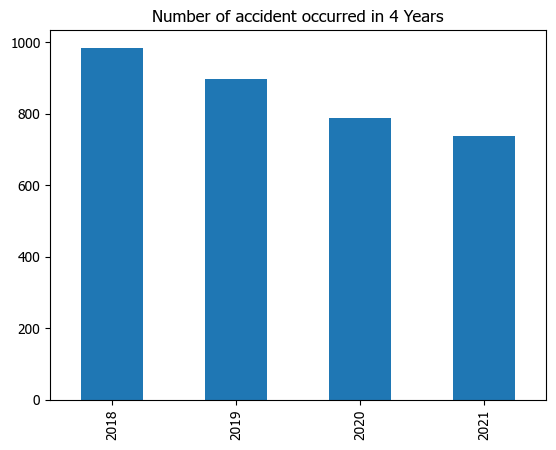

In [41]:
# Read dataframe and plot graph
accident_each_year = df[~df['accident_timestamp'].dt.year.isin([2017, 2022])]
accident_each_year['accident_timestamp'].dt.year.value_counts().plot(kind='bar', title='Number of accident occurred in 4 Years');


จากกราฟ จะพบว่า <u>**แนวโน้ม**</u>อุบัติเหตุที่เกิดขึ้นในแต่ละปีนั้น 
- มีจำนวนการเกิดอุบัติเหตุที่ลดลงอย่างต่อเนื่อง ตั้งแต่ปี **2018 - 2021**
- ทำให้สามารถอนุมานได้ว่า ในปี 2022 จะมีแนวโน้มการเกิดอุบัติเหตุบนทางด่วนลดลง ซึ่งเป็นไปในทิศทางที่ดีขึ้น

---

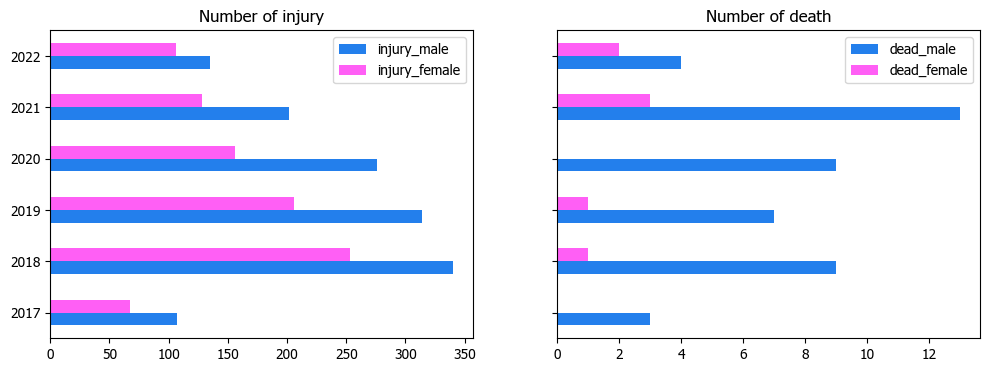

In [42]:
# Prepare data
accident_occurred = df.groupby([df['accident_timestamp'].dt.year])[
    ['injury_male', 'injury_female', 'dead_male', 'dead_female']].sum()
accident_occurred.reset_index(inplace=True)

# Plot graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

accident_occurred.plot(kind='barh', x='accident_timestamp',  y=[
                        'injury_male', 'injury_female'], ylabel='', ax=ax1, title='Number of injury', color=['#237FEC', '#FF5FF5'])
accident_occurred.plot(kind='barh', x='accident_timestamp',  y=[
                        'dead_male', 'dead_female'], ylabel='', ax=ax2, title='Number of death', color=['#237FEC', '#FF5FF5'])

plt.show()


จากกราฟ แสดงจำนวณผู้ได้รับ<u>**บาดเจ็บและเสียชีวิต**</u>จากอุบัติเหตบนทางด่วน
- จำนวนอุบัติเหตที่เกิดขึ้นนั้น จะสังเกตได้ว่า จำนวนผู้ได้รับบาดเจ็บและการเสียชีวิตจากการเกิดอุบัติเหตุนั้น เป็นผู้ชาย**มากกว่า**ผู้หญิงในทุกปี
---

# Accident in Weekday
การเกิดอุบัติเหตุโดยแบ่งจากวันในสัปดาห์

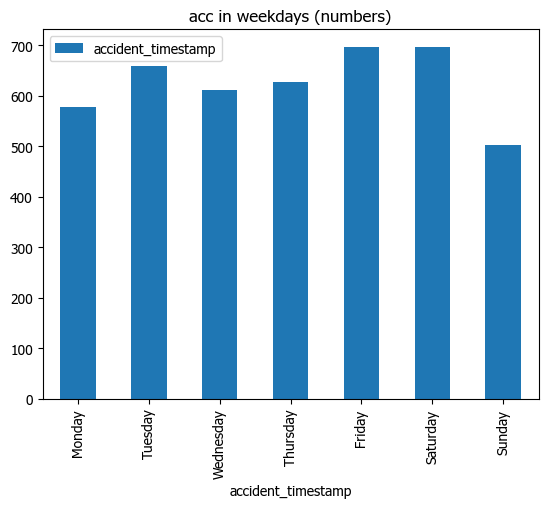

In [43]:
# Category of weekday
cats = ['Monday', 'Tuesday', 'Wednesday',
        'Thursday', 'Friday', 'Saturday', 'Sunday']

# Prepare dataframe to calculate
accident_numbers = df.groupby([df['accident_timestamp'].dt.day_name()])[['accident_timestamp']].count().reindex(cats)
accident_numbers.plot(kind='bar', title='acc in weekdays (numbers)');

จากกราฟ จำนวนการเกิดอุบัติเหตุเมื่อแยกเป็นรายสัปดาห์
- จะพบว่าอุบัติเหตที่เกิดขึ้นนั้น เกิดในทุกวันในสัดส่วนที่ใกล้เคียงกัน
- ในวัน**อาทิตย์**เป็น วันที่ผู้คนส่วนใหญ่ใช้เวลาอยู่บ้าน จึงทำให้เกิดอุบัติเหตุน้อยกว่าวันอื่น
---------------------

In [44]:
# Prepare Data 
accident_numbers = df.copy()
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accident_numbers['weekday'] = df['accident_timestamp'].dt.day_name()


# Create Interactive
@interact(indicator=list(df['cause'].unique()))
def plot_chart(indicator):
    plt.figure(figsize=(16, 4))

    new_df = accident_numbers[accident_numbers['cause'] == indicator]['weekday'].value_counts().reindex(cats)
    new_df = pd.DataFrame(new_df)
    new_df.columns = ['count']
    sns.barplot(x=cats, y='count', data=new_df,width= 0.6 ,palette=['red' if i >= float(new_df.mean()) else 'gray' for i in new_df.values]).set(title = 'Number of accident in weekday')

    plt.grid()

interactive(children=(Dropdown(description='indicator', options=('เบรคกะทันหัน', 'ขับรถผิดช่องทาง', 'ก้มเก็บสิ…

จากกราฟ
- เป็นกราฟแท่ง แสดงจำนวนอุบัติเหตุในแต่ละวันในสัปดาห์
- เพิ่ม indicator ให้ผู้ใช้ดุเป็นรายอุบัติเหตุไป
- สีแดง หมายถึง สูงกว่าค่าเฉลี่ย 
- สีเทา หมายถึง ต่ำกว่าค่าเฉลี่ย
---------

In [45]:
time = ['กลางคืน', 'เช้า', 'สาย', 'บ่าย', 'เย็น', 'ค่ำ']
accident_hour = df.copy()
accident_hour['hour'] = accident_hour['accident_timestamp'].dt.hour

# Create Interactive
@interact(indicator=list(df['cause'].unique()))
def plot_chart(indicator):
    plt.figure(figsize=(16, 4))

    new_df = accident_hour[accident_hour['cause'] == indicator]['hour'].value_counts()
    new_df = pd.DataFrame(new_df)
    new_df.columns = ['count']

    time_range = new_df.groupby(pd.cut(new_df.index, np.arange(0, 25, 4))).sum()
    time_range.index = time

    sns.barplot(x=time, y='count', data=time_range,width= 0.6, palette=['red' if i > float(time_range['count'].mean()) else 'gray' for i in time_range['count']]).set(title = 'Number of accident in time range')

    plt.grid()

interactive(children=(Dropdown(description='indicator', options=('เบรคกะทันหัน', 'ขับรถผิดช่องทาง', 'ก้มเก็บสิ…

-----------------------------
# Express way

In [46]:
# Create dataframe to present 'number of accident occured'
df_mtw = df.groupby([df['express_way']])[['accident_timestamp']].count()
df_mtw.reset_index(inplace=True)
df_mtw.set_index('express_way', inplace=True)
df_mtw.sort_values(['accident_timestamp'], ascending=False, inplace=True)

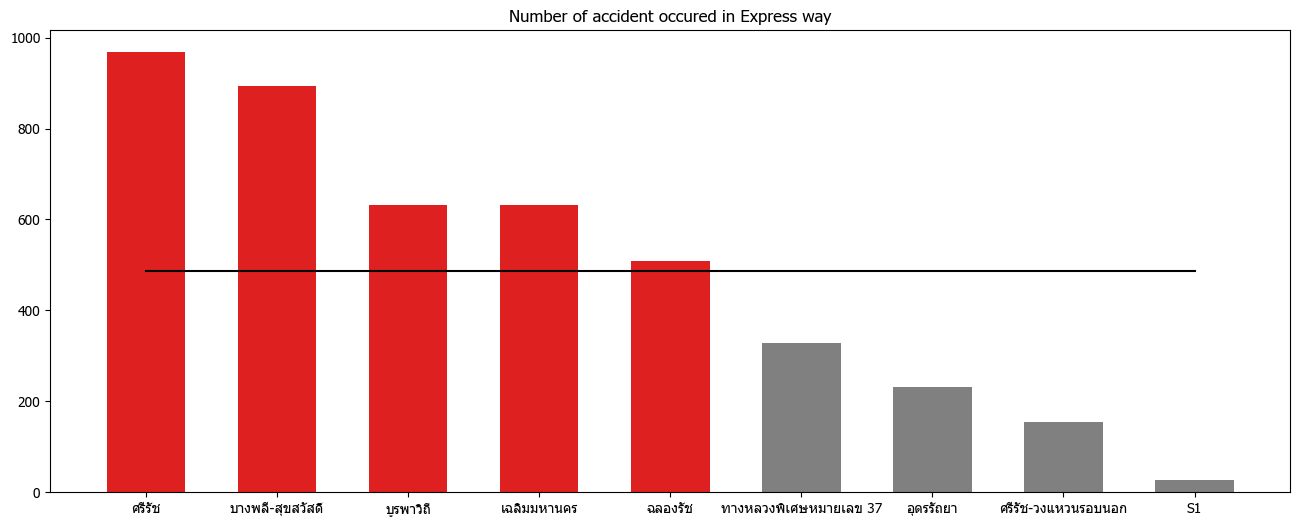

In [47]:
# Calculate average -> data type float
df_mtw.columns = ['count']
average = float(df_mtw['count'].mean())

# Set grah size (width,height)
plt.figure(figsize=(16,6))

# Create graph -> barplot & line plot
sns.barplot(x=df_mtw.index, y='count', data=df_mtw, palette=['red' if i > average else 'gray' for i in df_mtw['count']] ,width= 0.6)
sns.lineplot(x=df_mtw.index, y=average, data=df_mtw, color='black')

# Set label & title
plt.title('Number of accident occured in Express way')
plt.xlabel('')
plt.ylabel('')

# Show graph
plt.show()



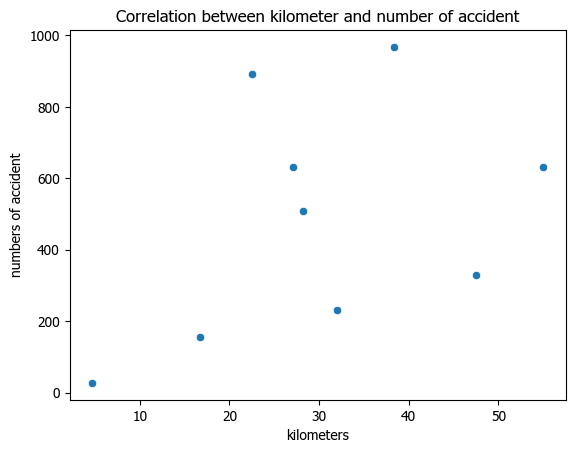

In [48]:
kilometers = [38.4, 22.5, 55.0, 27.1, 28.2, 47.5, 32.0, 16.7, 4.7]

df_mtw['km'] = kilometers
df_mtw

sns.scatterplot(data=df_mtw, x='km', y='count').set(title = 'Correlation between kilometer and number of accident', xlabel = 'kilometers', ylabel = 'numbers of accident');

In [49]:
df_mtw.corr()

,count,km
count,1.000000,0.421589
km,0.421589,1.000000


จาก scatter plot และ ตาราง correlation
- จะพบว่า ระยะทางของถนนนั้น ไม่มีผลต่อการเกิดอุบัติเหตุเลย
- จำนวนครั้งที่เกิดอุบัติเหตุบนทางด่วน ไม่มีความสัมพันธ์ กับ ระยะทางของทางด่วน
-----------

In [50]:
# Create Widget
top = widgets.IntRangeSlider(
    value=[0, len(df['cause'].unique())],
    min=0,
    max=len(df['cause'].unique()),
    step=5,
    description="# Top:",
    orientation="horizontal",
    readout=True,
    readout_format=",",
)

color_list = ['red' if i > (len(df['cause'].unique())-5) else 'grey' for i in range(len(df['cause'].unique()))]

@interact
def plot_chart(total_cases=top):

    # Prepare DataFrame
    a = pd.DataFrame(df['cause'].value_counts())
    a.reset_index()
    
    
    # plot graph
    a['cause'][total_cases[0]:total_cases[1]].sort_values(ascending=True).plot(kind='barh', title='Cause of accident', figsize=(10, 8)
        , color= color_list )

    # Show Grid
    plt.grid()  


interactive(children=(IntRangeSlider(value=(0, 45), description='# Top:', max=45, readout_format=',', step=5),…

In [51]:
indicator_list = list(df['cause'].unique())
motorway = df_mtw.index
sorting = ['default', 'ascending' , 'descending']

@interact(cause=indicator_list, sorted_by = sorting)
def plot_chart(cause,sorted_by):

    # interactive seaborn 
    plt.figure(figsize=(16, 4))
    new_df = df[df['cause'] == cause]['express_way'].value_counts().reindex(motorway)
    new_df = pd.DataFrame(new_df)
    new_df.columns = ['count']
    average = float(new_df['count'].mean())
    new_df = new_df.fillna(0)

    if sorted_by == 'default':
        new_df.reindex(motorway)
    elif sorted_by == 'ascending':
        new_df.sort_values(by='count',ascending=True,inplace=True)
    elif sorted_by == 'descending':
        new_df.sort_values(by='count',ascending=False,inplace=True)


    sns.barplot(x=new_df.index, y='count', data=new_df,width= 0.6, palette=['red' if i > average else 'gray' for i in new_df['count']]).set(title = 'Number of accident in each motorway')

    # show grid line
    # plt.grid()  


interactive(children=(Dropdown(description='cause', options=('เบรคกะทันหัน', 'ขับรถผิดช่องทาง', 'ก้มเก็บสิ่งขอ…

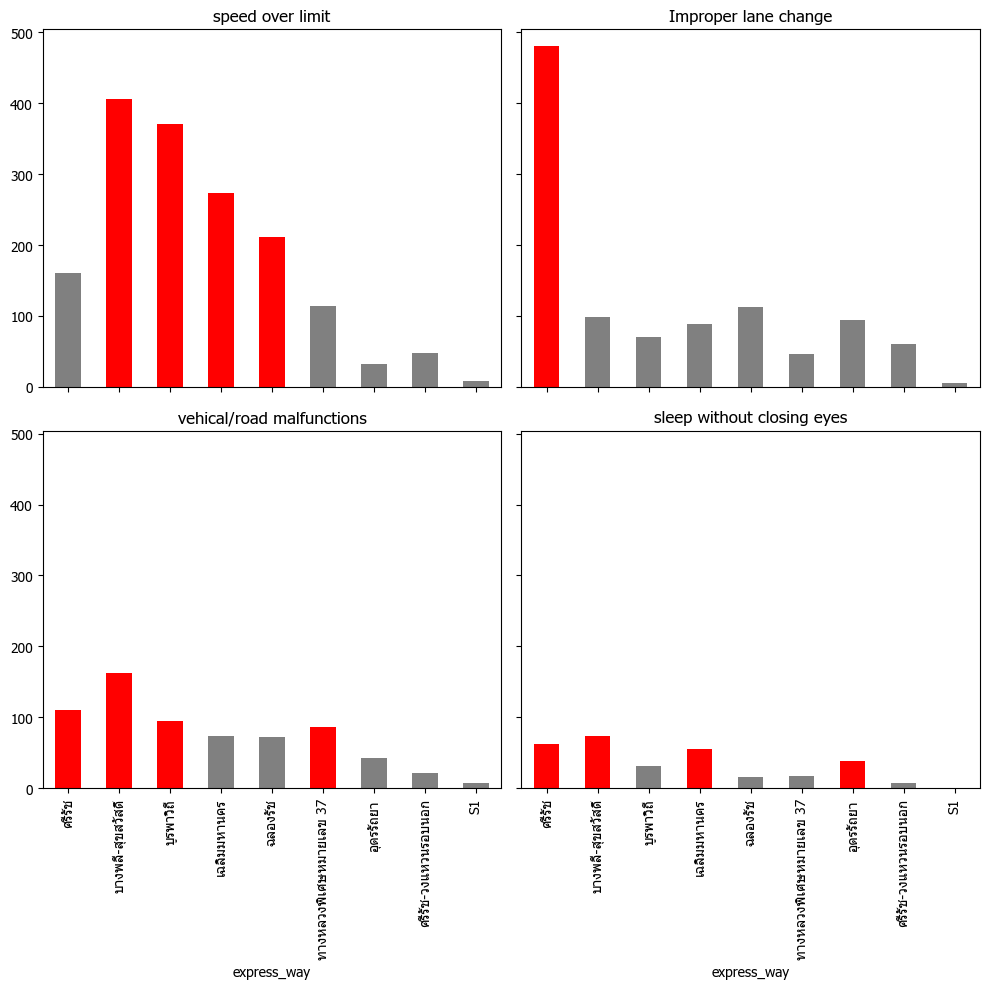

In [52]:
motorway = df_mtw.index

x = 2
y = 2

graph_title = [('ขับรถเร็วเกินกำหนด', 'speed over limit'), ('เปลี่ยนช่องทางกะทันหัน', 'Improper lane change'),
                ('สาเหตุจากสภาพรถ/ถนน', 'vehical/road malfunctions'), ('หลับใน', 'sleep without closing eyes')]

fig, axs = plt.subplots(x, y, figsize=(10, 10), sharex=True, sharey=True,)

num = 0
for i in range(x):
    for j in range(y):
        subplot = df[df['cause'] == graph_title[num][0]
                    ]['express_way'].value_counts().reindex(motorway)
        subplot.plot(kind='bar', title=graph_title[num][1], ax=axs[i, j]
        
        , color = ['red' if i > subplot.mean() else 'gray' for i in subplot.values])
        num += 1

fig.tight_layout()
plt.show()



จากกราฟ 
- เส้นทางด่วน**ศรีรัช** เป็นทางด่วนที่มีการเกิดอุบัติเหตุ**มากที่สุด** แต่สาเหตุหลักของการเกิดอุบัติเหตุบนเส้นทางนี้ เกิดจากการ**ขับรถเปลี่ยนเลนกระทันหัน**เป็นหลัก
- เส้นทางด่วน**บางพลี-สุขสวัสดิ์ และ เส้นทางด่วนบูรพาวิธี** เป็นเส้นทางที่มีการเกิดอุบัติเหตุเนื่องจาก**การขับรถเร็วเกินกำหนด**เป็นจำนวนมาก
- จะเห็นได้ว่าทางด่วน**ศรีรัช**ที่มีการเกิดอุบัติเหตุ**มากที่สุด** แต่กลับมีการเกิดอุบัติเหตุจากสาเหตุหลักคือ**การขับรถเร็วเกินกำหนด**ที่น้อยกว่าทางด่วนอื่นเป็นจำนวนมาก จึงควรให้เป็นกรณีศึกษาสำหรับทางด่วนอื่น

-------------------
# Suggestion

เนื่องจากสาเหตุหลักๆของการเกิดอุบัติเหตบนทางหลวงเกิดจาก **การขับรถเร็วเกินกำหนด** / **เกิดจากตัวผู้ขับขี่เอง** 

ดังนั้น เพื่อลดการเกิดอุบัติเหตุที่อาจเกิดขึ้นในอนาคต จำเป็นที่จะต้องให้ผู้ขับขี่ มีความตระหนักถึงความปลอดภัยในการใช้รถและถนน ร่วมกับผู้อื่นมากยิ่งขึ้น

ตัวอย่างเช่น 

- ระบบการตัดคะแนนความประพฤติในการขับรถเพื่อให้ผู้ขับขี่มีความตระหนักถึงการเคารพกฎจราจรมากยิ่งขึ้น
- การติดตั้งป้ายกำหนดความเร็วบนทางด่วน

<img src= 'https://github.com/Pooote/Business_Intelligent/blob/main/policy.jpg?raw=true'> 